# Linear Regression - Bike Sharing Assignment

## Problem Statement 
### A bike rental company would like to understand the factors on which the demand for their shared bikes depends
### The ask is to model the demand for shared bikes with the available independent variables

In [3]:
#Import all necessary libariries for this linear modeling exercise

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Section 1: Understanding Data

In [6]:
df_bikerental = pd.read_csv('day.csv')

In [7]:
df_bikerental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
df_bikerental.shape

(730, 16)

In [9]:
df_bikerental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### It is observered that there are no null values in the dataset

### 1.1 Data Cleansing

#### Drop Casual and Registered columns in the target variable  cnt is the sum of these 2 variables

In [13]:
df_bikerental=df_bikerental.drop(['casual','registered'],axis=1)

In [14]:
df_bikerental.shape

(730, 14)

#### Renaming columns for better visiblity

In [16]:
df_bikerental.rename(columns={'instant':'sl_no','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'count'},inplace=True)

In [17]:
df_bikerental.head()

,sl_no,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Datetime field is and object which needs to be converted to datetime data type

In [19]:
df_bikerental.datetime = df_bikerental.datetime.str.replace(' ', '')
df_bikerental['datetime']=pd.to_datetime(df_bikerental.datetime,format='%d-%m-%Y')
df_bikerental['datetime'] = df_bikerental['datetime'].apply(pd.Timestamp.timestamp)

In [20]:
df_bikerental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sl_no              730 non-null    int64  
 1   datetime           730 non-null    float64
 2   season             730 non-null    int64  
 3   year               730 non-null    int64  
 4   month              730 non-null    int64  
 5   holiday            730 non-null    int64  
 6   weekday            730 non-null    int64  
 7   workingday         730 non-null    int64  
 8   weather_condition  730 non-null    int64  
 9   temp               730 non-null    float64
 10  atemp              730 non-null    float64
 11  humidity           730 non-null    float64
 12  windspeed          730 non-null    float64
 13  count              730 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 80.0 KB


#### Year needs to be decoded for EDA

In [22]:
df_bikerental.year.value_counts()

year
0    365
1    365
Name: count, dtype: int64

In [23]:
df_bikerental['year']= df_bikerental['year'].replace({0:2018, 1: 2019})

#### Observation: Season field is a categorical value which needs to be reverse decoded to String such that we can generate dummies

In [25]:
df_bikerental['season']=df_bikerental.season.astype('str')

In [26]:
df_bikerental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sl_no              730 non-null    int64  
 1   datetime           730 non-null    float64
 2   season             730 non-null    object 
 3   year               730 non-null    int64  
 4   month              730 non-null    int64  
 5   holiday            730 non-null    int64  
 6   weekday            730 non-null    int64  
 7   workingday         730 non-null    int64  
 8   weather_condition  730 non-null    int64  
 9   temp               730 non-null    float64
 10  atemp              730 non-null    float64
 11  humidity           730 non-null    float64
 12  windspeed          730 non-null    float64
 13  count              730 non-null    int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 80.0+ KB


In [27]:
df_bikerental['season']= df_bikerental['season'].replace({'1':'Spring', '2':'Summer','3': 'Autumn','4':'Winter'})

In [28]:
df_bikerental['season'].value_counts()

season
Autumn    188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [29]:
df_bikerental.head(5)

,sl_no,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,count
0,1,1.514765e+09,Spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1.514851e+09,Spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1.514938e+09,Spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1.515024e+09,Spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1.515110e+09,Spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
#create dummy variables for Seasons
seasons_dummy=pd.get_dummies(df_bikerental['season'],dtype=int, drop_first=True)
seasons_dummy

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [31]:
df_bikerental =pd.concat([df_bikerental,seasons_dummy], axis=1)

In [32]:
#### Weather condition field has categorical values > 2 hence we will create dummies for modeling
df_bikerental['weather_condition']= df_bikerental['weather_condition'].replace({1:'Clear or Partly Cloudy', 2:'Mist or Broken Cloud', 3: 'Light Rain or Snow', 4:'Heavy Rain or Snow'})
df_bikerental['weather_condition'].value_counts()

weather_condition
Clear or Partly Cloudy    463
Mist or Broken Cloud      246
Light Rain or Snow         21
Name: count, dtype: int64

In [33]:
#create dummy variables for Weather Conditions
weather_dummy=pd.get_dummies(df_bikerental['weather_condition'],dtype=int, drop_first=True)
weather_dummy

,Light Rain or Snow,Mist or Broken Cloud
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [34]:
df_bikerental =pd.concat([df_bikerental,weather_dummy], axis=1)

In [35]:
df_bikerental.head(5)

,sl_no,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,count,Spring,Summer,Winter,Light Rain or Snow,Mist or Broken Cloud
0,1,1.514765e+09,Spring,2018,1,0,6,0,Mist or Broken Cloud,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2,1.514851e+09,Spring,2018,1,0,0,0,Mist or Broken Cloud,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,3,1.514938e+09,Spring,2018,1,0,1,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,4,1.515024e+09,Spring,2018,1,0,2,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,5,1.515110e+09,Spring,2018,1,0,3,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [36]:
## Mark categorical variabels accrodingly
df_bikerental['sl_no']=df_bikerental.year.astype('category')
df_bikerental['year']=df_bikerental.year.astype('category')
df_bikerental['month']=df_bikerental.month.astype('category')
df_bikerental['holiday']=df_bikerental.holiday.astype('category')
df_bikerental['weekday']=df_bikerental.weekday.astype('category')
df_bikerental['workingday']=df_bikerental.workingday.astype('category')
df_bikerental['weather_condition']=df_bikerental.weather_condition.astype('category')

In [37]:
df_bikerental.describe()

,datetime,temp,atemp,humidity,windspeed,count,Spring,Summer,Winter,Light Rain or Snow,Mist or Broken Cloud
count,7.300000e+02,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,1.546258e+09,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.028767,0.336986
std,1.821978e+07,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.167266,0.473004
min,1.514765e+09,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.530511e+09,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.546258e+09,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.562004e+09,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.577750e+09,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Section 2 EDA

## Pair Plot

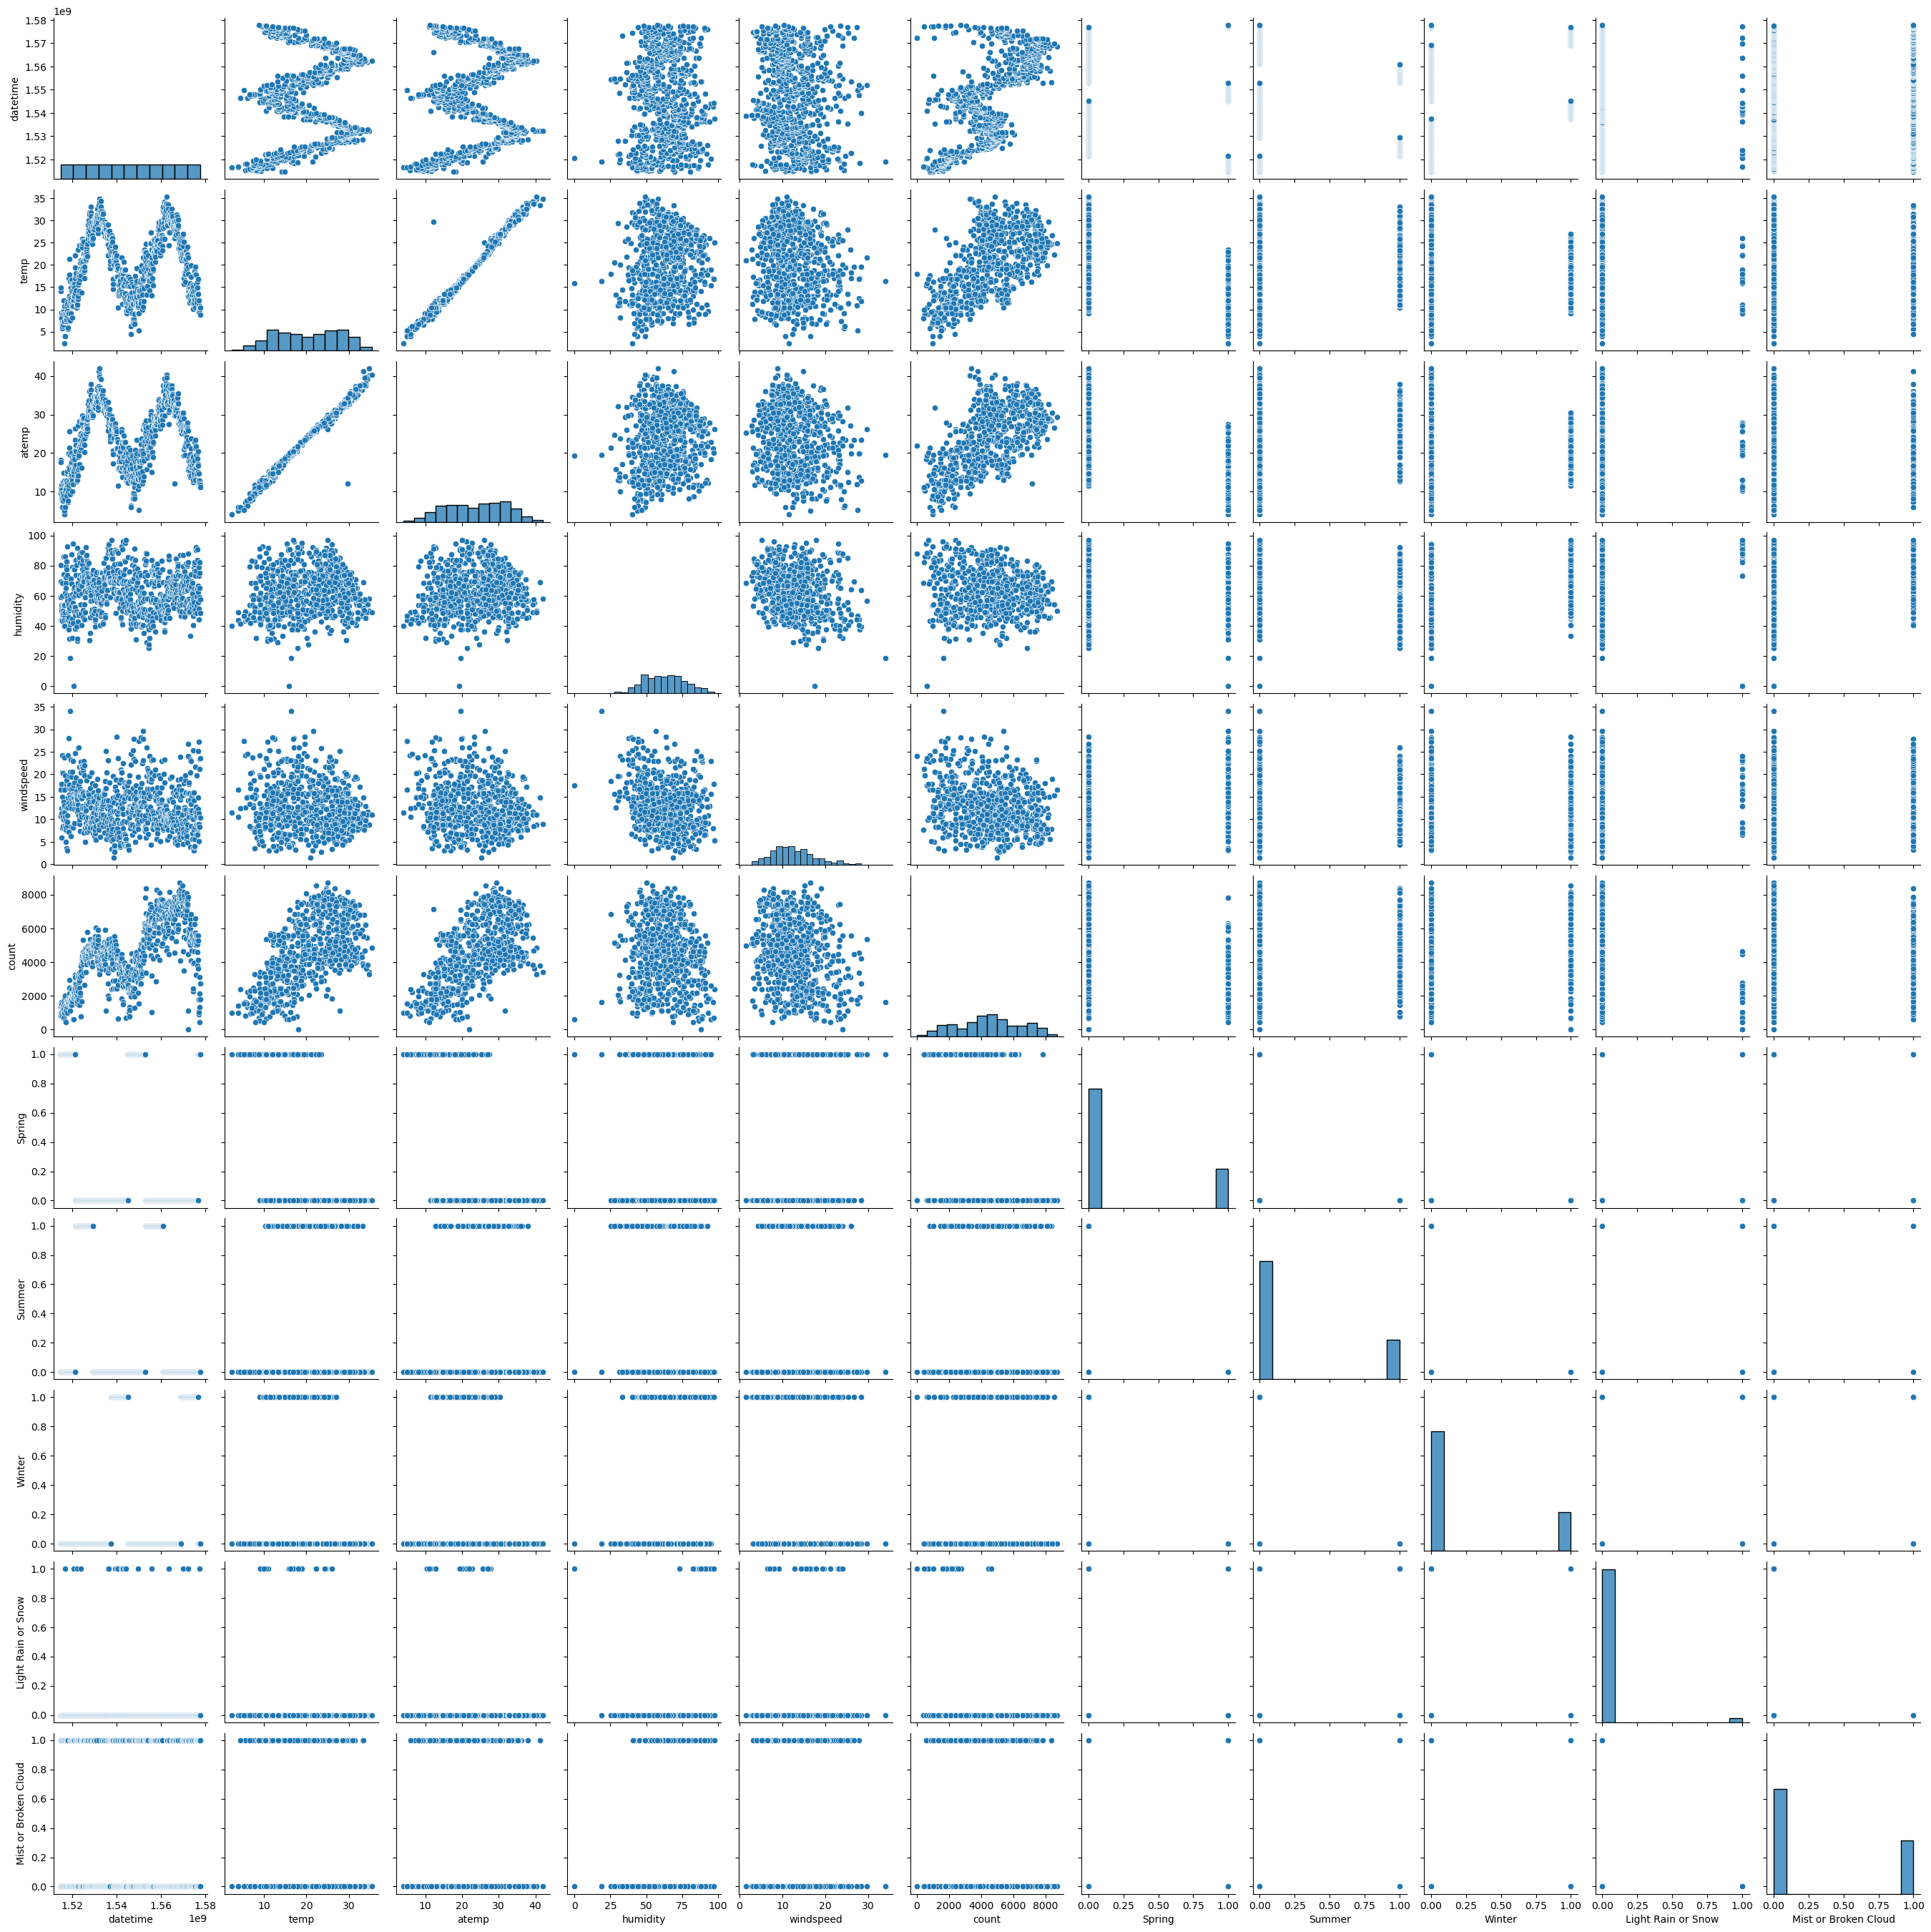

In [40]:
sns.pairplot(df_bikerental)
plt.show()

### Observation: There is a linear pattern of count with respect to few of independent variables

### Box plot

<Axes: xlabel='weather_condition', ylabel='count'>

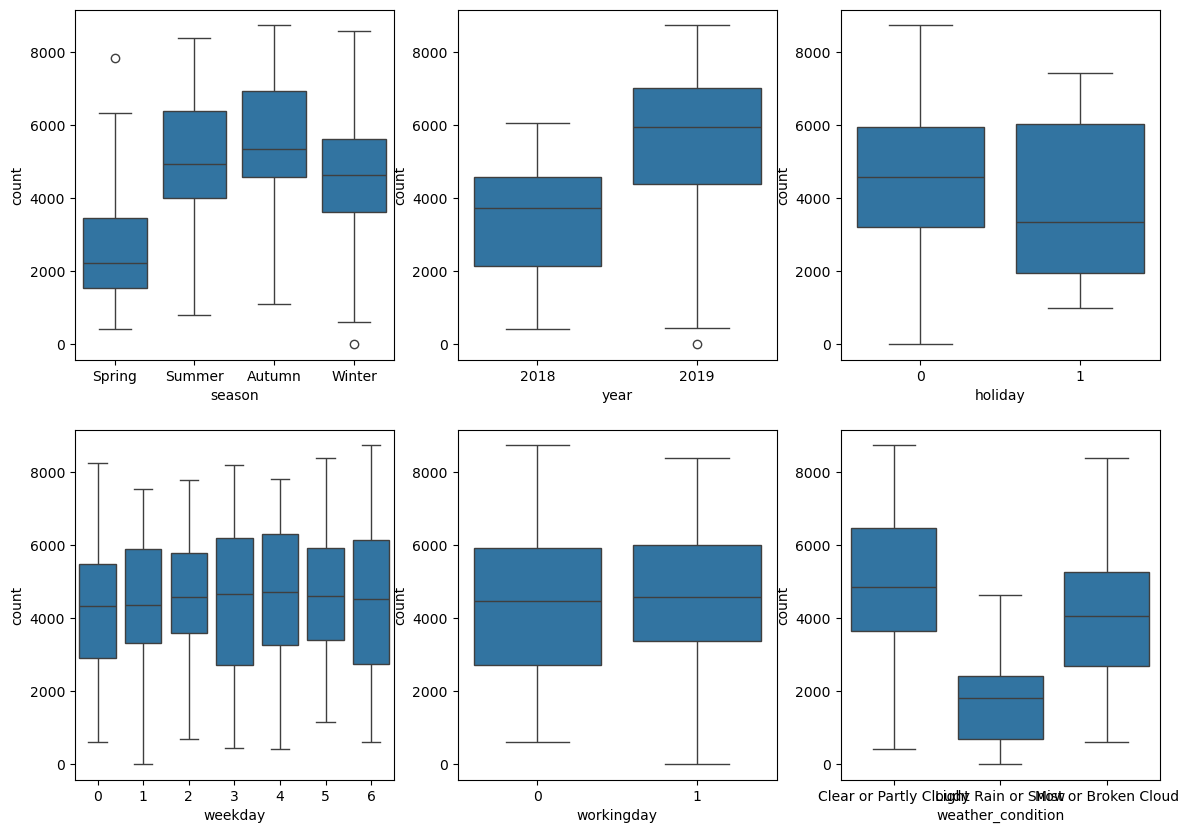

In [43]:
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='count',data=df_bikerental)
plt.subplot(2,3,2)
sns.boxplot(x='year', y='count',data=df_bikerental)
plt.subplot(2,3,3)
sns.boxplot(x='holiday', y='count',data=df_bikerental)
plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='count',data=df_bikerental)
plt.subplot(2,3,5)
sns.boxplot(x='workingday', y='count',data=df_bikerental)
plt.subplot(2,3,6)
sns.boxplot(x='weather_condition', y='count',data=df_bikerental)

#### Bar Plots

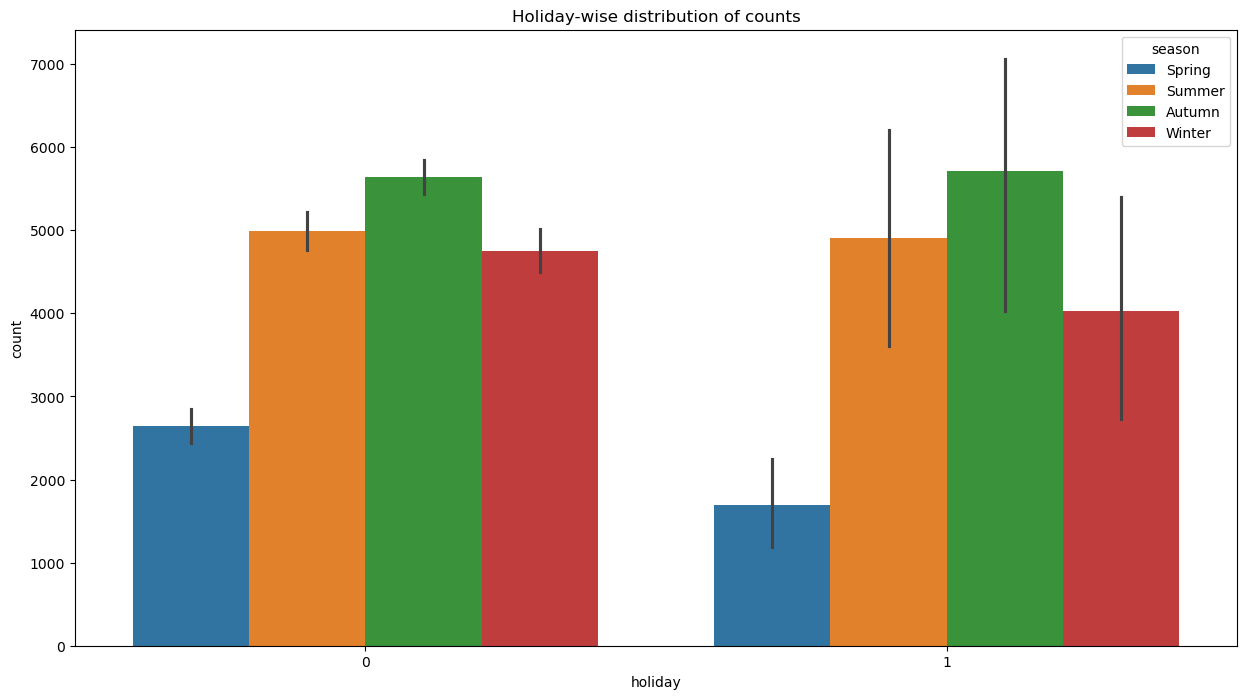

In [45]:
#Barplot for Holiday distribution of counts

fig,ax=plt.subplots(figsize=(15,8))

sns.barplot(data=df_bikerental,x='holiday',y='count',hue='season')
ax.set_title('Holiday-wise distribution of counts')
plt.show()

#### Observation : Number of rides on a holiday is higher in Autumn

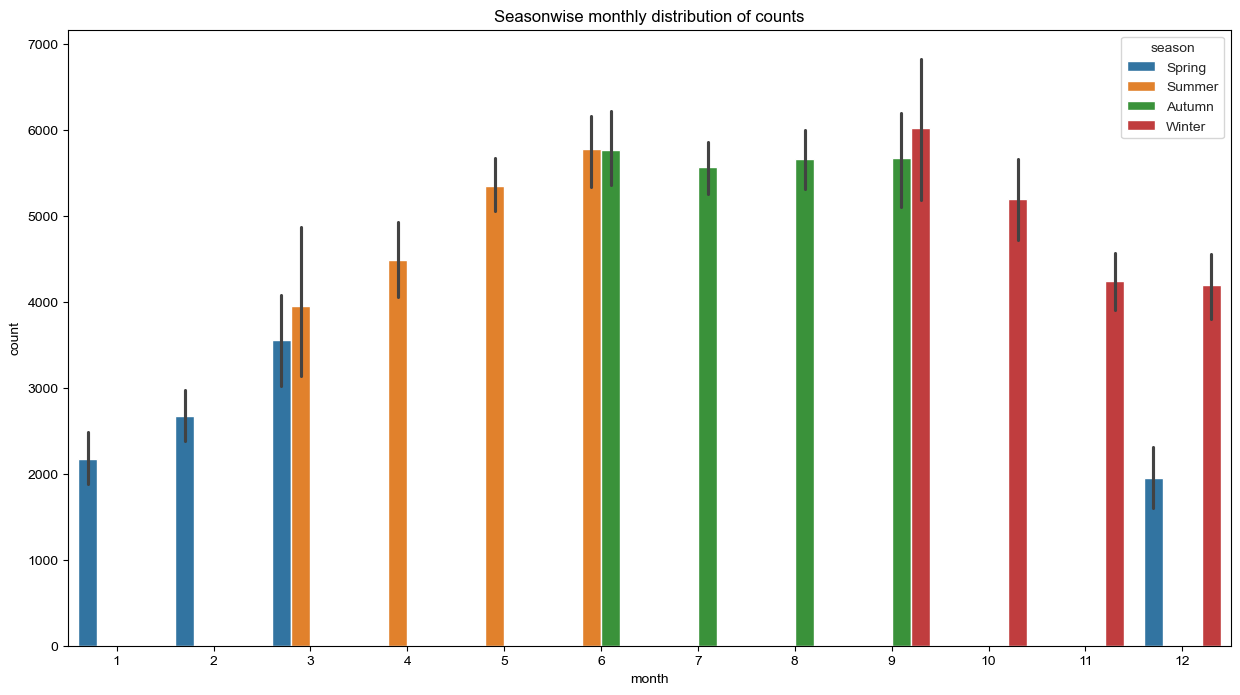

In [47]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='count',data=df_bikerental[['month','count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

#### Observation : Number of rides in Summer is high followed by Autumn

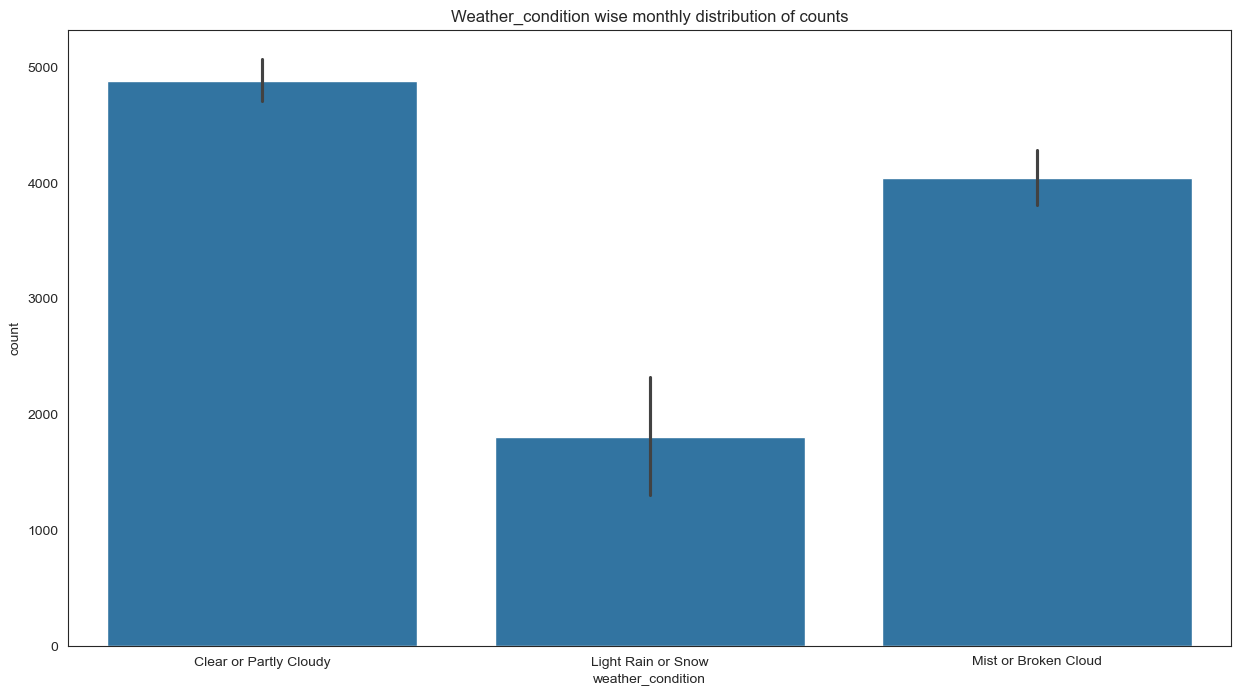

In [49]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='count',data=df_bikerental[['month','count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

#### Observation : While data dictionary had 4 categories the dataset does not have any data for Heavy Rains

### Correlation and Heatmap 

In [52]:
df_bikerental.describe().columns

Index(['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'Spring',
       'Summer', 'Winter', 'Light Rain or Snow', 'Mist or Broken Cloud'],
      dtype='object')

In [53]:
corr_var=['count','temp', 'atemp', 'humidity', 'windspeed', 'Spring','Summer', 'Winter', 'Light Rain or Snow', 'Mist or Broken Cloud']
df_bikerental_corr = df_bikerental[corr_var]
bikerental_corr=df_bikerental_corr.corr(method='pearson', min_periods=1, numeric_only=False)
bikerental_corr

,count,temp,atemp,humidity,windspeed,Spring,Summer,Winter,Light Rain or Snow,Mist or Broken Cloud
count,1.000000,0.627044,0.630685,-0.098543,-0.235132,-0.561702,0.145325,0.064619,-0.240602,-0.170686
temp,0.627044,1.000000,0.991696,0.128565,-0.158186,-0.619408,0.154876,-0.225590,-0.058461,-0.096297
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876,-0.624772,0.163151,-0.205634,-0.064937,-0.092933
humidity,-0.098543,0.128565,0.141512,1.000000,-0.248506,-0.184884,-0.002870,0.163908,0.267592,0.490628
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000,0.178880,0.097421,-0.135612,0.117332,-0.037177
Spring,-0.561702,-0.619408,-0.624772,-0.184884,0.178880,1.000000,-0.332099,-0.324859,-0.022400,0.029198
Summer,0.145325,0.154876,0.163151,-0.002870,0.097421,-0.332099,1.000000,-0.329650,-0.043283,0.040011
Winter,0.064619,-0.225590,-0.205634,0.163908,-0.135612,-0.324859,-0.329650,1.000000,0.093128,0.033857
Light Rain or Snow,-0.240602,-0.058461,-0.064937,0.267592,0.117332,-0.022400,-0.043283,0.093128,1.000000,-0.122696
Mist or Broken Cloud,-0.170686,-0.096297,-0.092933,0.490628,-0.037177,0.029198,0.040011,0.033857,-0.122696,1.000000


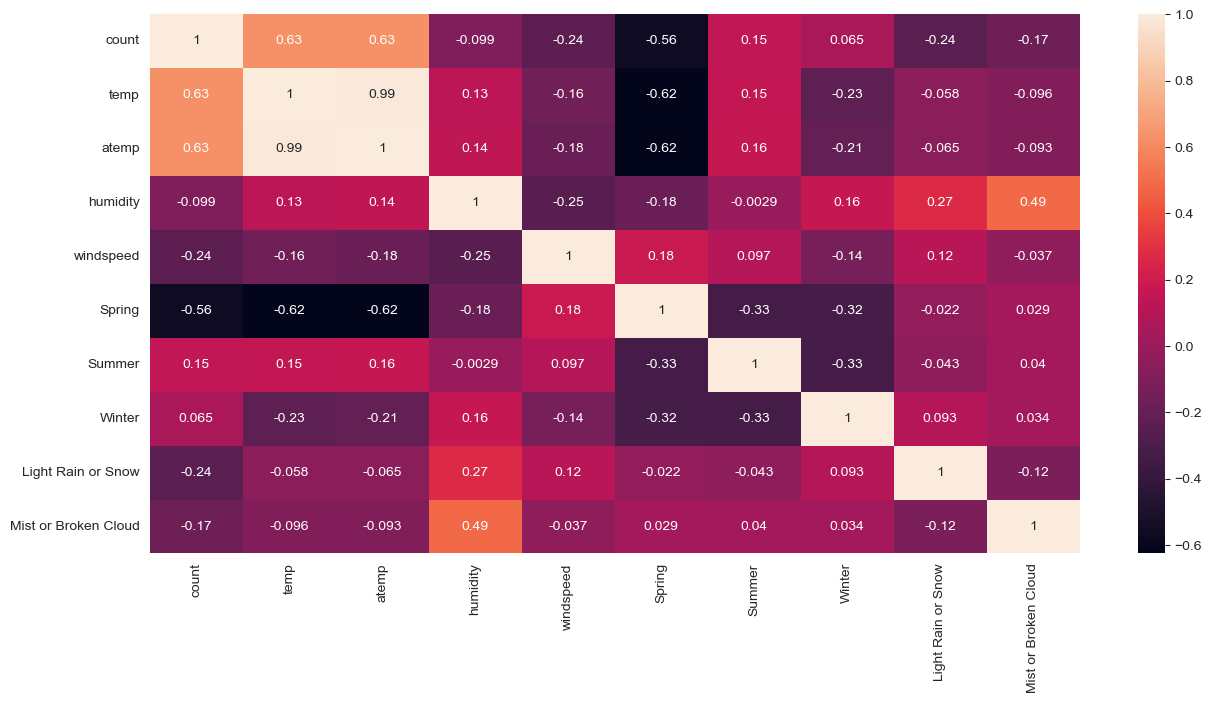

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(bikerental_corr,annot=True)
plt.show()

#### Observations:
- Count of rides has a negative corelation with Spring season - possiblly due to vacations and long trips users may use other modes
- Count of rides isnegatively impacted on rainy days
-  Days with warmer temperatures has higher rider counts 

In [56]:
#Drop columns which are not needed
df_bikerental=df_bikerental.drop(['sl_no','season','weather_condition'], axis=1)

## Section 3 RFE

The following steps will be performed as part of RFE

1. Splitting the Data into Training and Testing Sets

2. Rescaling the Features- MinMax

3. Dividing into X and Y sets for the model building

4. Building the model using RFE: Recursive feature elimination- Building model using statsmodel, for the detailed statistics

5. Residual Analysis of the train data

6. Making Predictions

7. Model Evaluation

#### 1. Splitting Data into Training and Testing Sets

In [59]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df_bikerental, train_size = 0.7, test_size = 0.3, random_state = 100)

In [60]:
df_bikerental.columns

Index(['datetime', 'year', 'month', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'Spring', 'Summer', 'Winter',
       'Light Rain or Snow', 'Mist or Broken Cloud'],
      dtype='object')

#### 2. Rescaling the Features- MinMax

In [62]:
#### 2 Splitting Data into Training and Testing Sets

In [63]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars =['temp', 'atemp', 'humidity','windspeed', 'count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,datetime,year,month,holiday,weekday,workingday,temp,atemp,humidity,windspeed,count,Spring,Summer,Winter,Light Rain or Snow,Mist or Broken Cloud
653,1.571184e+09,2019,10,0,2,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1.564531e+09,2019,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1.551571e+09,2019,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1.577664e+09,2019,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1.556410e+09,2019,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1


#### 3 Dividing into X and Y sets for the model building

In [65]:
y_train = df_train.pop('count')
X_train = df_train

### 4 Building the model using RFE

In [67]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [68]:
# Running RFE with the output number of the variable equal to 10
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select = 10)
rfe=rfe.fit(X_train,y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('datetime', False, 6),
 ('year', True, 1),
 ('month', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Light Rain or Snow', True, 1),
 ('Mist or Broken Cloud', True, 1)]

In [70]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Light Rain or Snow', 'Mist or Broken Cloud'],
      dtype='object')

In [71]:
X_train.columns[~rfe.support_]

Index(['datetime', 'month', 'weekday', 'workingday', 'atemp'], dtype='object')

In [72]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [73]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [74]:
# Running linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [75]:
#Print summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          4.78e-183
Time:                        19:59:05   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -465.2596 

#### <span style='color:RED'> Observation: All features are significant and hence we will not change this model </span>

In [77]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16826030.27
6,Spring,4.54
3,temp,3.50
8,Winter,3.10
7,Summer,2.06
4,humidity,1.87
10,Mist or Broken Cloud,1.56
9,Light Rain or Snow,1.24
5,windspeed,1.19
1,year,1.03


#### 5 Residual Analysis of the train data

In [79]:
y_train_count = lm.predict(X_train_rfe)

In [80]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

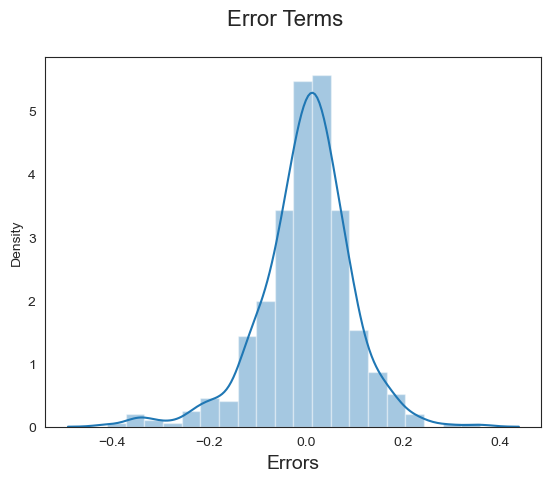

In [81]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 16)                  # Plot heading 
plt.xlabel('Errors', fontsize = 14)                         # X-label

#### <span style='color:RED'>Observation: Normal distrubution of errors here indicates that  model assumptions are met and the model fits the data well </span>

#### 6 Making Predictions

##### Applying the scaling on the test sets

In [85]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [86]:
num_vars =['temp', 'atemp', 'humidity','windspeed', 'count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

##### Dividing into X_test and y_test

In [88]:
y_test = df_test.pop('count')
X_test = df_test

In [89]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

##### Making predictions

In [91]:
y_pred = lm.predict(X_test_new)

#### 7 Model Evaluation

Text(0, 0.5, 'y_pred')

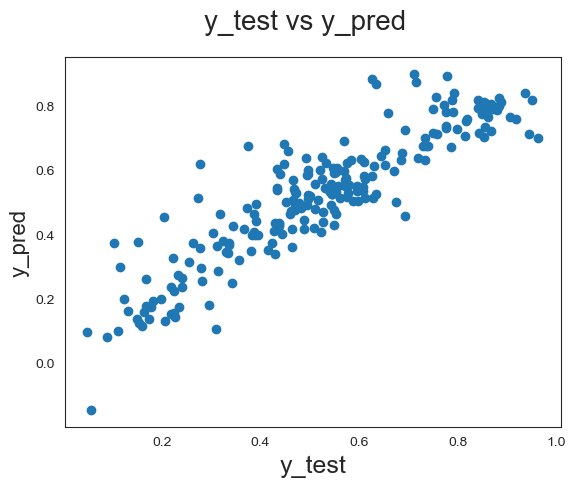

In [93]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [94]:
r2_score(y_true=y_test,y_pred=y_pred)

0.8063526208371334

### <span style='color:Blue'> Conclusion: The R-squared or coefficient of determination is 0.81 on average, it means that predictor is only able to predict 81% of the variance in the target variable which is contributed by independent variables. </span>

# --------------THE END----------------